In [1]:
library(ggplot2)
library(RColorBrewer)
library(pheatmap)
library(repr)

In [2]:
raw <- read.csv("../experiments/calib/summary.calibParam.tsv", sep="\t")
head(raw)

Set Species_number Species_name                        FLX_EU_avg YLD_EU_avg
1 A   1              Acidaminococcus_sp_D21                   NA            NA
2 A   2              Acinetobacter_pittii_ANC_4052            NA            NA
3 A   3              Alistipes_finegoldii_DSM_17242      436.150    0.00102057
4 A   4              Bacteroides_caccae_ATCC_43185       407.598    0.00173770
5 A   5              Bifidobacterium_bifidum_NCIMB_41171      NA            NA
6 A   6              Brevibacillus_brevis_NBRC_100599    220.462    0.01878030
  CRW_EU_avg CNC_EU_avg rmax_EU_avg maxOD_EU_avg FLX_DACH ⋯ CRW_vegan CNC_vegan
1       NA         NA      NA             NA          NA  ⋯       NA        NA 
2       NA         NA      NA             NA          NA  ⋯       NA        NA 
3 0.253117   0.124990   1.109       1.953880     471.134  ⋯ 0.253117  0.233749 
4 0.202503   0.214412   1.109       0.236206     411.444  ⋯ 0.202503  0.204247 
5       NA         NA      NA             NA          NA  ⋯       NA        NA 
6 0.219409   0.092890   1.109       0.599086     222.723  ⋯ 0.219409  0.131921 
  rmax_vegan maxOD_vegan FLX_vegetarian YLD_vegetarian CRW_vegetarian
1    NA             NA        NA                NA           NA      
2    NA             NA        NA                NA           NA      
3 1.109       1.387780   471.327        0.15524700     0.253117      
4 1.109       0.616371   415.818        0.00170617     0.202503      
5    NA             NA        NA                NA           NA      
6 1.109      19.500500   221.996        0.00149689     0.219409      
  CNC_vegetarian rmax_vegetarian maxOD_vegetarian
1       NA          NA                NA         
2       NA          NA                NA         
3 0.158489       1.109           1.38730         
4 0.530884       1.109           2.34354         
5       NA          NA                NA         
6 0.142274       1.109           1.38716

In [3]:
flx <- raw[, c(1,2,3,grep("FLX", colnames(raw)))]
colnames(flx)

[1] "Set"               "Species_number"    "Species_name"     
 [4] "FLX_EU_avg"        "FLX_DACH"          "FLX_diabetes2"    
 [7] "FLX_gluten_free"   "FLX_high_fat"      "FLX_high_fiber"   
[10] "FLX_high_protein"  "FLX_mediterranean" "FLX_unhealthy"    
[13] "FLX_vegan"         "FLX_vegetarian"

In [4]:
colnames(flx) <- gsub("FLX_", "", colnames(flx))

In [5]:
flx_mat <- data.matrix(flx[,-c(1,2,3)])
rownames(flx_mat) <- flx$Species_name

flx_mat

EU_avg   DACH     diabetes2 gluten_free
Acidaminococcus_sp_D21                        NA       NA       NA        NA   
Acinetobacter_pittii_ANC_4052                 NA       NA       NA        NA   
Alistipes_finegoldii_DSM_17242           436.150  471.134  439.522   471.376   
Bacteroides_caccae_ATCC_43185            407.598  411.444  409.541   408.897   
Bifidobacterium_bifidum_NCIMB_41171           NA       NA       NA        NA   
Brevibacillus_brevis_NBRC_100599         220.462  222.723  221.648   221.820   
Campylobacter_rectus_RM3267                   NA       NA       NA        NA   
Clostridium_difficile_NAP07              423.400  435.084  431.518   432.569   
Corynebacterium_ulcerans_809             343.709  365.881  384.116   365.217   
Dialister_invisus_DSM_15470                   NA       NA       NA        NA   
Eggerthella_lenta_DSM_2243               471.187  504.250  474.647   504.056   
Enterococcus_caccae_ATCC_BAA_1240             NA       NA       NA        NA   
Escherichia_coli_str_K_12_substr_MG1655  267.105  266.320  269.299   272.697   
Faecalibacterium_cf_prausnitzii_KLE1255  635.699  634.392  630.162   640.718   
Helicobacter_pylori_26695               1369.290 1364.840 1403.080  1385.650   
Lactobacillus_gastricus_PS3              409.979  391.105  408.280   388.961   
Methyloversatilis_universalis_Fam50001   533.689  523.768  520.076   529.111   
Microbacterium_oleivorans_NBRC_103075    548.869  548.700  555.049   549.807   
Odoribacter_laneus_YIT_12061             406.547  438.417  412.153   438.645   
Peptoniphilus_timonensis_JC401          1911.600 2182.890 1910.560  2182.840   
Pseudomonas_nitroreducens_HBP1           446.915  387.279  391.434   444.755   
Prevotella_ruminicola_23                 427.930  416.603  422.982   426.552   
Rothia_dentocariosa_ATCC_17931                NA       NA       NA        NA   
Ruminococcus_lactaris_ATCC_29176         871.372  873.013  870.875   888.966   
Streptococcus_intermedius_JTH08               NA       NA       NA        NA   
Vibrio_mimicus_MB_451                    443.001  493.537  449.164   523.229   
Weissella_confusa_LBAE_C39_2                  NA       NA       NA        NA   
                                        high_fat high_fiber high_protein
Acidaminococcus_sp_D21                        NA       NA         NA    
Acinetobacter_pittii_ANC_4052                 NA       NA         NA    
Alistipes_finegoldii_DSM_17242           464.995  475.223    474.784    
Bacteroides_caccae_ATCC_43185            425.905  411.669    410.133    
Bifidobacterium_bifidum_NCIMB_41171           NA       NA         NA    
Brevibacillus_brevis_NBRC_100599         222.236  221.050    221.450    
Campylobacter_rectus_RM3267                   NA       NA         NA    
Clostridium_difficile_NAP07              460.074  433.552    450.290    
Corynebacterium_ulcerans_809             365.528  364.504    365.083    
Dialister_invisus_DSM_15470                   NA       NA         NA    
Eggerthella_lenta_DSM_2243               503.096  518.145    515.377    
Enterococcus_caccae_ATCC_BAA_1240             NA       NA         NA    
Escherichia_coli_str_K_12_substr_MG1655  271.919  277.179    271.763    
Faecalibacterium_cf_prausnitzii_KLE1255  615.187  580.084    637.156    
Helicobacter_pylori_26695               1474.750 1219.060   1243.010    
Lactobacillus_gastricus_PS3              394.624  388.509    388.724    
Methyloversatilis_universalis_Fam50001   495.050  522.503    521.349    
Microbacterium_oleivorans_NBRC_103075    590.779  551.529    556.247    
Odoribacter_laneus_YIT_12061             462.705  442.963    441.558    
Peptoniphilus_timonensis_JC401          2184.300 2206.790   2207.520    
Pseudomonas_nitroreducens_HBP1           400.408  383.435    422.802    
Prevotella_ruminicola_23                 442.288  421.534    426.105    
Rothia_dentocariosa_ATCC_17931                NA       NA         NA    
Ruminococcus_lactaris_ATCC_29176         722.944

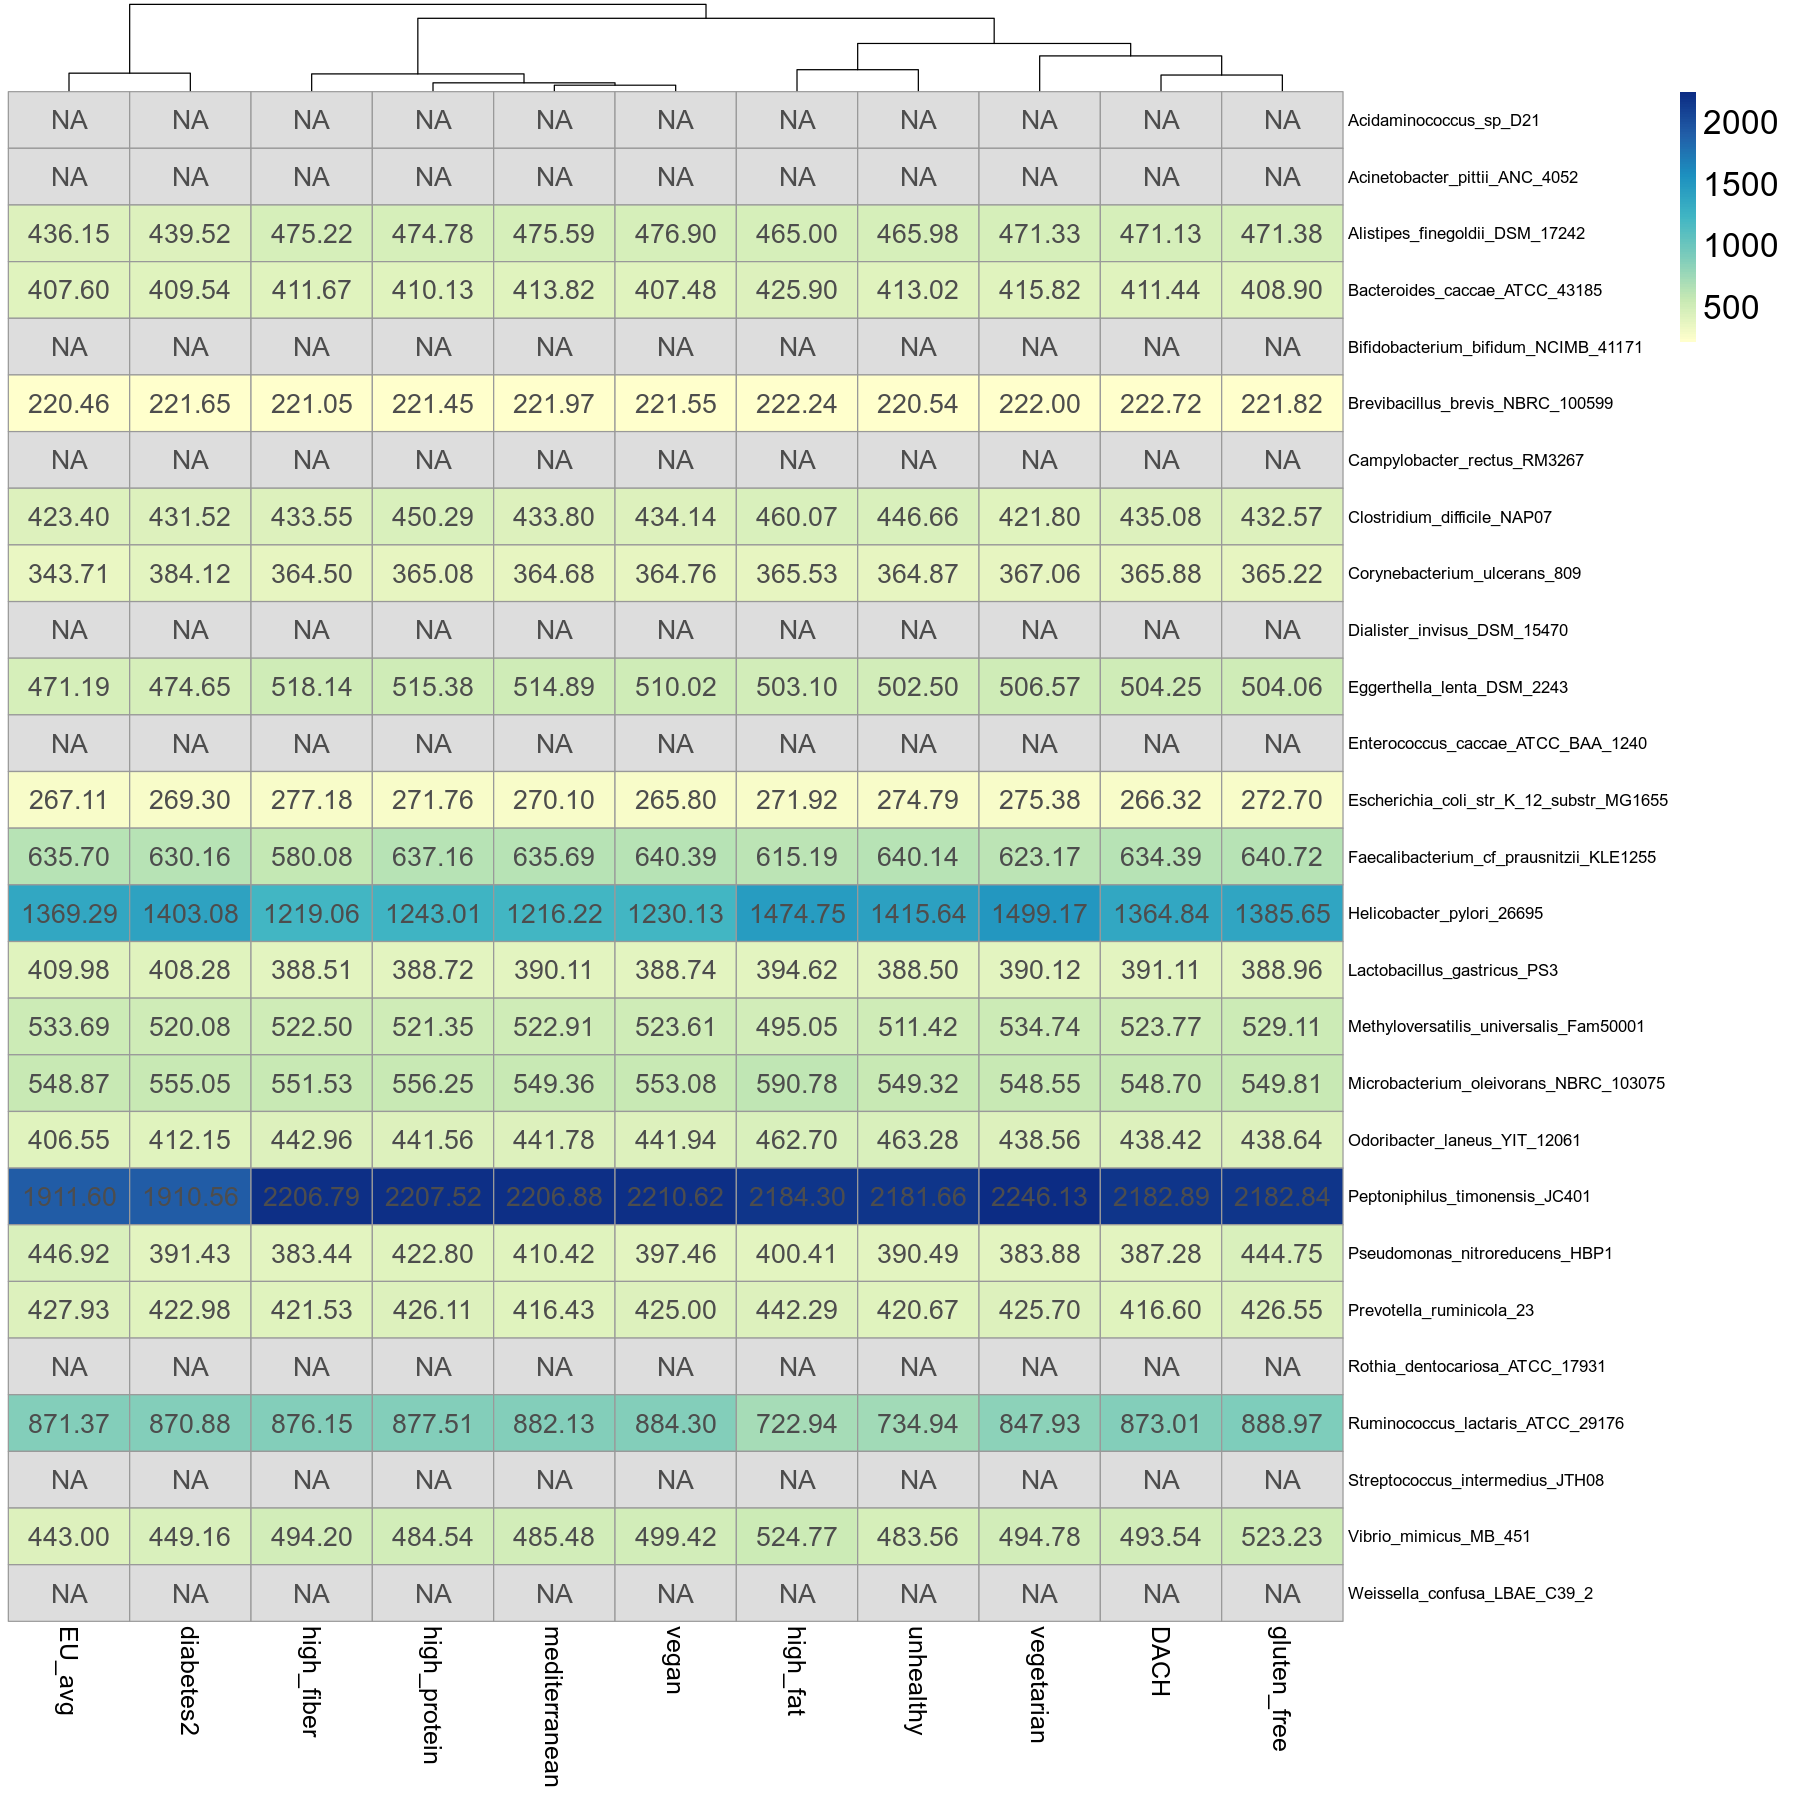

In [6]:
# Change plot size to 4 x 3
options(repr.plot.width=15, repr.plot.height=15)

pheatmap(flx_mat, cluster_rows = FALSE, cluster_cols = TRUE, 
         display_numbers=T, color= colorRampPalette(brewer.pal(n = 7, name = "YlGnBu"))(100),
         fontsize=20, fontsize_row = 10, fontsize_col = 15)

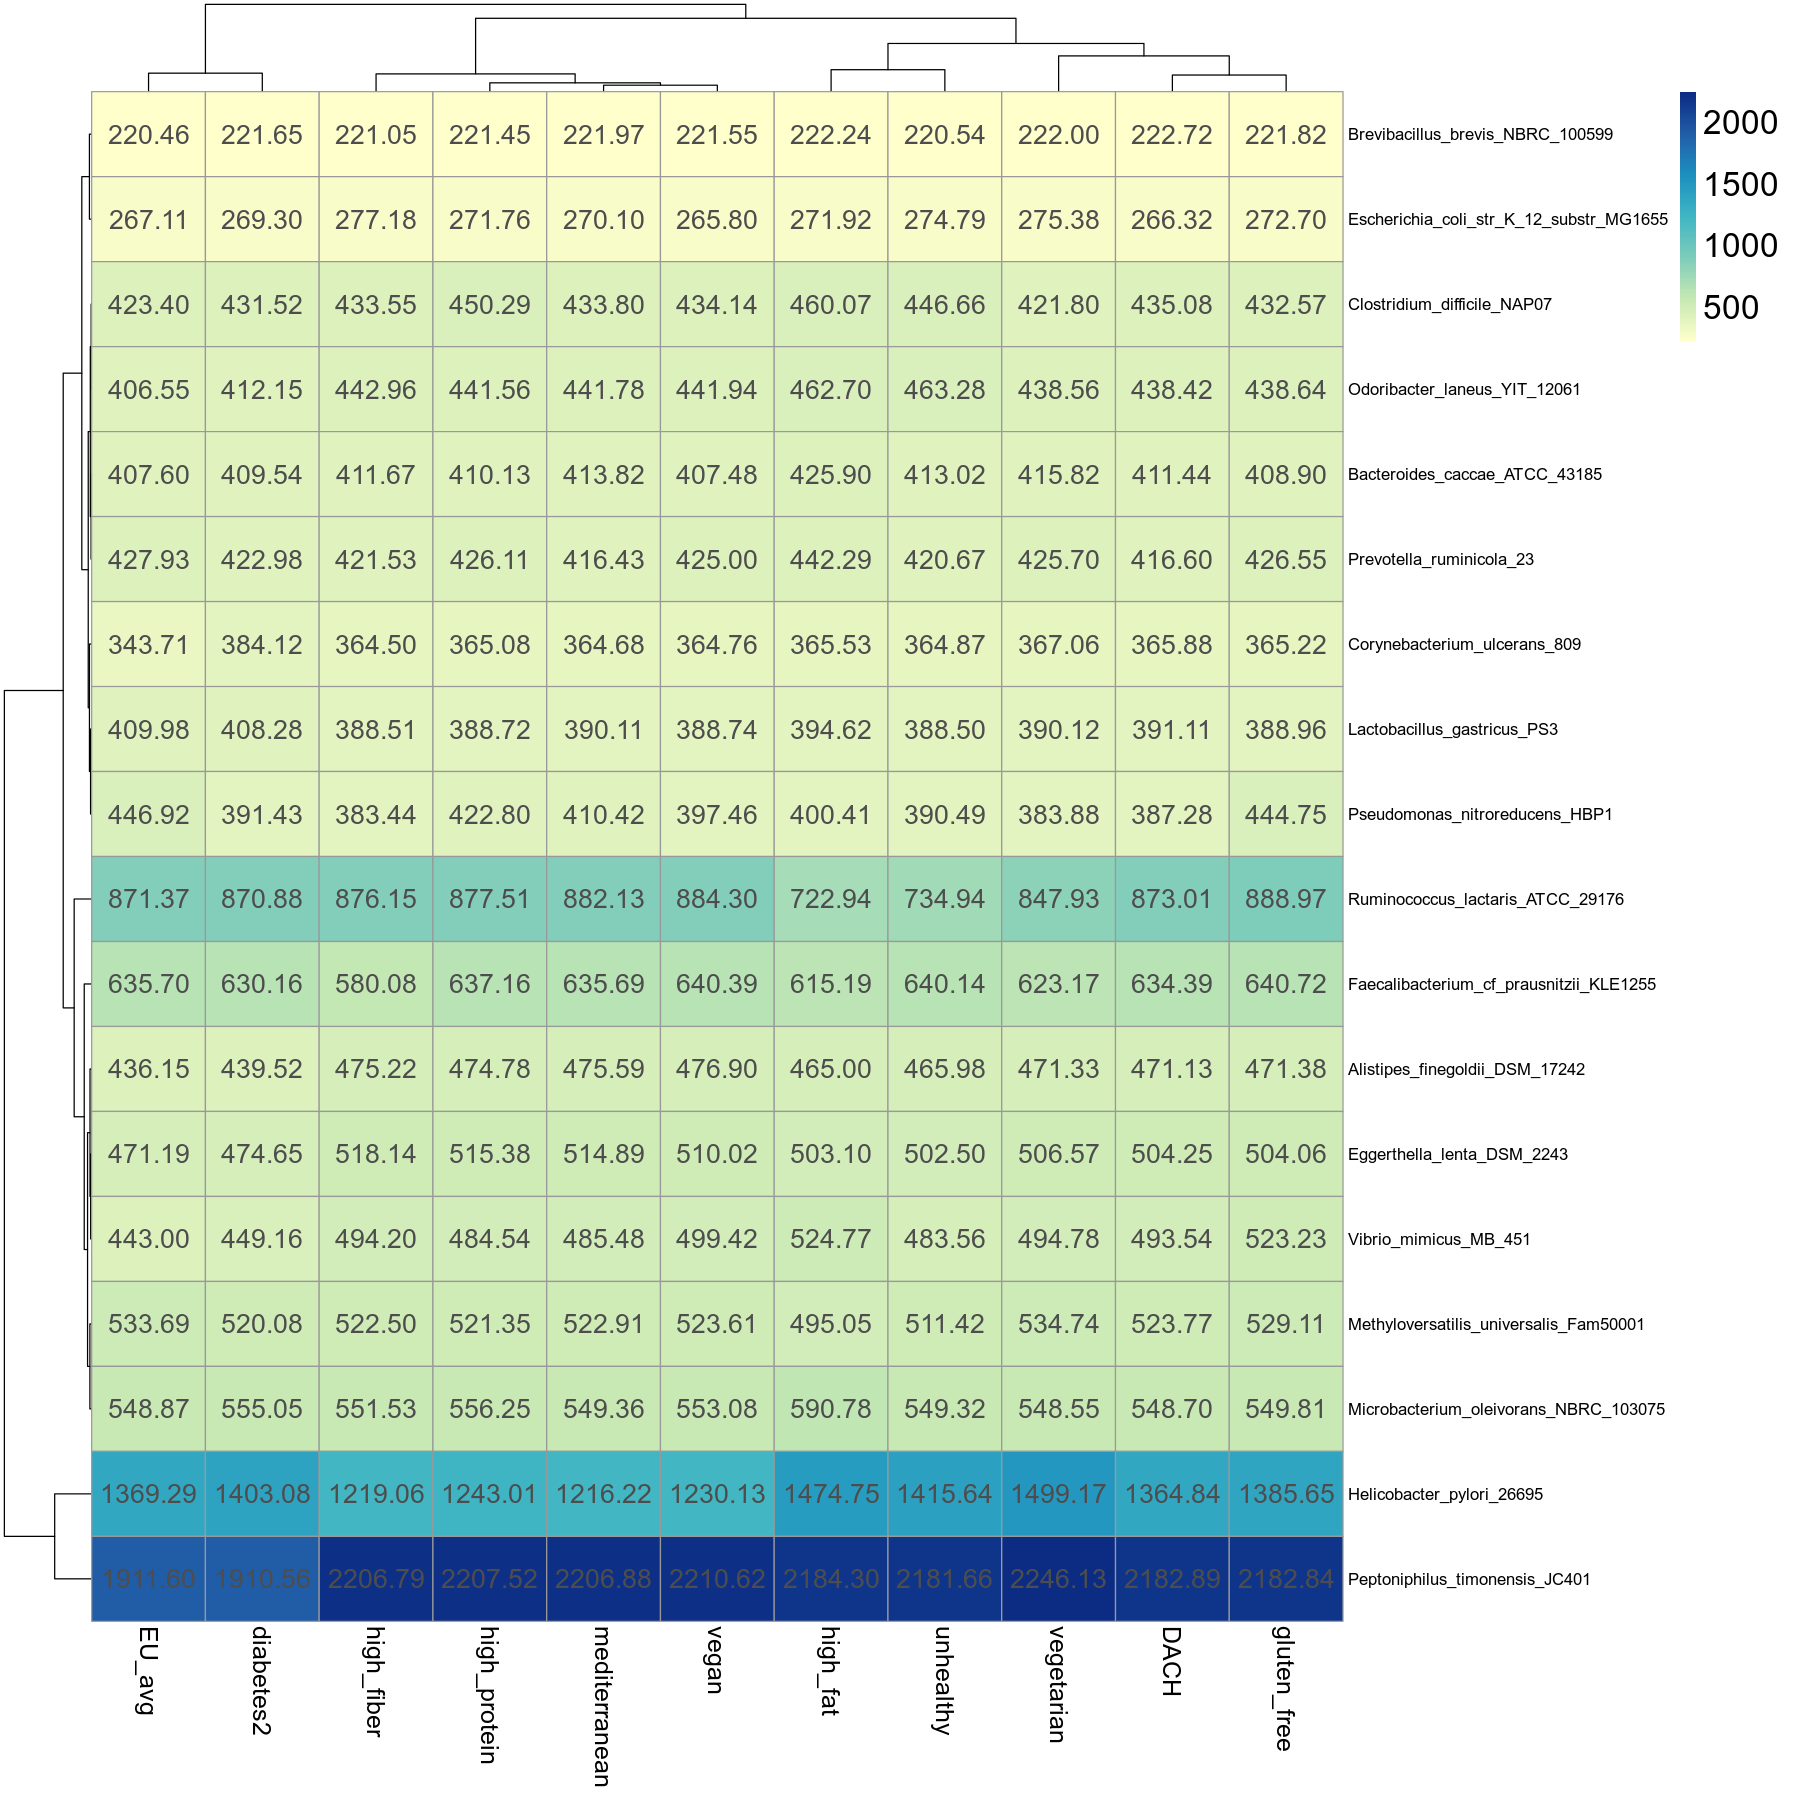

In [7]:
flx_mat_clean <- flx_mat[complete.cases(flx_mat),]

# Change plot size to 4 x 3
options(repr.plot.width=15, repr.plot.height=15)

pheatmap(flx_mat_clean, cluster_rows = TRUE, cluster_cols = TRUE, 
         display_numbers=T, color= colorRampPalette(brewer.pal(n = 7, name = "YlGnBu"))(100),
         fontsize=20, fontsize_row = 10, fontsize_col = 15)

In [8]:
t(apply(flx_mat_clean, 1, rank)) # rank among diets, lowest value = 1 and highest value = 11

EU_avg DACH diabetes2 gluten_free
Alistipes_finegoldii_DSM_17242           1      5    2         7         
Bacteroides_caccae_ATCC_43185            2      6    4         3         
Brevibacillus_brevis_NBRC_100599         1     11    6         7         
Clostridium_difficile_NAP07              2      8    3         4         
Corynebacterium_ulcerans_809             1      9   11         7         
Eggerthella_lenta_DSM_2243               1      6    2         5         
Escherichia_coli_str_K_12_substr_MG1655  3      2    4         8         
Faecalibacterium_cf_prausnitzii_KLE1255  7      5    4        11         
Helicobacter_pylori_26695                6      5    8         7         
Lactobacillus_gastricus_PS3             11      8   10         5         
Methyloversatilis_universalis_Fam50001  10      8    3         9         
Microbacterium_oleivorans_NBRC_103075    3      2    9         6         
Odoribacter_laneus_YIT_12061             1      3    2         5         
Peptoniphilus_timonensis_JC401           2      5    1         4         
Pseudomonas_nitroreducens_HBP1          11      3    5        10         
Prevotella_ruminicola_23                10      2    5         9         
Ruminococcus_lactaris_ATCC_29176         5      6    4        11         
Vibrio_mimicus_MB_451                    1      6    2        10         
                                        high_fat high_fiber high_protein
Alistipes_finegoldii_DSM_17242           3        9          8          
Bacteroides_caccae_ATCC_43185           11        7          5          
Brevibacillus_brevis_NBRC_100599        10        3          4          
Clostridium_difficile_NAP07             11        5         10          
Corynebacterium_ulcerans_809             8        2          6          
Eggerthella_lenta_DSM_2243               4       11         10          
Escherichia_coli_str_K_12_substr_MG1655  7       11          6          
Faecalibacterium_cf_prausnitzii_KLE1255  2        1          8          
Helicobacter_pylori_26695               10        2          4          
Lactobacillus_gastricus_PS3              9        2          3          
Methyloversatilis_universalis_Fam50001   1        5          4          
Microbacterium_oleivorans_NBRC_103075   11        7         10          
Odoribacter_laneus_YIT_12061            10        9          6          
Peptoniphilus_timonensis_JC401           6        7          9          
Pseudomonas_nitroreducens_HBP1           7        1          9          
Prevotella_ruminicola_23                11        4          8          
Ruminococcus_lactaris_ATCC_29176         1        7          8          
Vibrio_mimicus_MB_451                   11        7          4          
                                        mediterranean unhealthy vegan
Alistipes_finegoldii_DSM_17242          10             4        11   
Bacteroides_caccae_ATCC_43185            9             8         1   
Brevibacillus_brevis_NBRC_100599         8             2         5   
Clostridium_difficile_NAP07              6             9         7   
Corynebacterium_ulcerans_809             3             5         4   
Eggerthella_lenta_DSM_2243               9             3         8   
Escherichia_coli_str_K_12_substr_MG1655  5             9         1   
Faecalibacterium_cf_prausnitzii_KLE1255  6             9        10   
Helicobacter_pylori_26695                1             9         3   
Lactobacillus_gastricus_PS3              6             1         4   
Methyloversatilis_universalis_Fam50001   6             2         7   
Microbacterium_oleivorans_NBRC_103075    5             4         8   
Odoribacter_laneus_YIT_12061             7            11         8   
Peptoniphilus_timonensis_JC401           8             3        10   
Pseudomonas_nitroreducens_HBP1           8             4         6   
Prevotella_ruminicola_23                 1             3         6   
Ruminococcus_lactaris_ATCC_29176         9             2 

In [9]:
# Find the most struggling speices in its most difficult environment
ind <- which(flx_mat_clean==max(flx_mat_clean), arr.ind = TRUE, useNames = FALSE)

sp <- rownames(flx_mat_clean)[ind[1]]
env <- colnames(flx_mat_clean)[ind[2]]

cat(sp, "\n")
cat(env, "\n")
cat("Highest FLX ~ Lowest \"raw\" biomass production rate = ", max(flx_mat_clean))

Peptoniphilus_timonensis_JC401 
vegetarian 
Highest FLX ~ Lowest "raw" biomass production rate =  2246.13

In [10]:
YLD_maxFLX <- raw[raw$Species_name == sp, paste0("YLD_", env)]

cat("YLD of the most struggling speices in its most difficult environment", YLD_maxFLX)

YLD of the most struggling speices in its most difficult environment 0.0837152

In [11]:
# Find the max YLD - lowest "raw" maxOD at stationery phase
yld_mat <- data.matrix(raw[, c(grep("YLD", colnames(raw)))])
rownames(yld_mat) <- raw$Species_name
colnames(yld_mat) <- gsub("YLD_", "", colnames(yld_mat))

ind <- which(yld_mat==max(yld_mat, na.rm=TRUE), arr.ind = TRUE, useNames = FALSE)

sp <- rownames(yld_mat)[ind[1]]
env <- colnames(yld_mat)[ind[2]]

cat(sp, "\n")
cat(env, "\n")
cat("Highest YLD ~ Lowest \"raw\" maxOD at stationery phase = ", max(yld_mat, na.rm=TRUE))

Corynebacterium_ulcerans_809 
unhealthy 
Highest YLD ~ Lowest "raw" maxOD at stationery phase =  1.03638